In [2]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
import config_readwrite as crw
import glob
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np
import os, sys
import pandas as pd
import pybedtools as pbt

from scipy import stats
from scipy.stats import zscore, boxcox

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

In [3]:
ENCODE = "/wynton/group/ahituv/data/encode/encode3/GRCh38-cCREs.bed.gz"#all_CTCF_DELS_PELS_PLS.bed"

In [4]:
# read
config, cfn = crw.read(os.path.join(os.path.dirname(os.getcwd()), "config.ini"))

CL = "HEPG2"
DATA = config["mpra"][f'{CL}.clean.transformed'] 

CL = "BJ"
DATA = config["mpra"][f'{CL}.clean.transformed'] 

RESULTS = config["path"]["results"]
BED = "/wynton/group/ahituv/fongsl/projects/US/data/genome_loci/tiles.bed"



RE = os.path.join(RESULTS, "encode")
RE_CL = os.path.join(RE, CL)

# make the results
for dirname in [RE, RE_CL]:
    if os.path.exists(dirname) is False:
        os.mkdir(dirname)


# change directory 
os.chdir(RE_CL)

In [5]:
lib = pbt.BedTool(BED)
encode = pbt.BedTool(ENCODE)

In [6]:
lib_encode = lib.intersect(encode, wao=True)

In [7]:
usecols = [0,1,2,3,7,8,9,10]
names=["#chr", "start", "end", "name", 'identifier', "cCRE_accession", "cCRE", "overlap_bp"]
df = pd.read_csv(lib_encode.fn, sep='\t',  header=None, 
                 names=names,
                usecols=usecols
                )
df["name_label"]=df["name"].apply(lambda x: x.split("_")[0])

df.head()

,#chr,start,end,name,identifier,cCRE_accession,cCRE,overlap_bp,name_label
0,chr3,29837526,29837795,bj_k27ac_down_chr3:29837526-29837795,.,.,.,0,bj
1,chr3,29837260,29837529,bj_k27ac_down_chr3:29837260-29837529,.,.,.,0,bj
2,chr3,29837792,29838061,bj_k27ac_down_chr3:29837792-29838061,.,.,.,0,bj
3,chr3,29837392,29837661,bj_k27ac_down_chr3:29837392-29837661,.,.,.,0,bj
4,chr3,29837659,29837928,bj_k27ac_down_chr3:29837659-29837928,.,.,.,0,bj


In [8]:
OVERLAP = 1

In [9]:
notzero = df.loc[df["overlap_bp"]>=OVERLAP].copy()
zeros = df.loc[df["overlap_bp"]<OVERLAP].copy()

In [10]:
zeros.groupby('name_label').count()

,#chr,start,end,name,identifier,cCRE_accession,cCRE,overlap_bp
name_label,,,,,,,,
BJ,8,8,8,8,8,8,8,8
HEPG2,20,20,20,20,20,20,20,20
HOB,18,18,18,18,18,18,18,18
K562,30,30,30,30,30,30,30,30
Neg,144,144,144,144,144,144,144,144
Pos,79,79,79,79,79,79,79,79
bj,433,433,433,433,433,433,433,433
hepg2,1718,1718,1718,1718,1718,1718,1718,1718
hob,5147,5147,5147,5147,5147,5147,5147,5147


In [12]:
notzero.groupby('name_label').count()

,#chr,start,end,name,identifier,cCRE_accession,cCRE,overlap_bp
name_label,,,,,,,,
BJ,87,87,87,87,87,87,87,87
HEPG2,116,116,116,116,116,116,116,116
HOB,40,40,40,40,40,40,40,40
K562,225,225,225,225,225,225,225,225
Neg,398,398,398,398,398,398,398,398
Pos,49,49,49,49,49,49,49,49
bj,4210,4210,4210,4210,4210,4210,4210,4210
hepg2,5202,5202,5202,5202,5202,5202,5202,5202
hob,32347,32347,32347,32347,32347,32347,32347,32347


In [13]:
mpra = pd.read_csv(DATA, sep='\t')
mpra

,Unnamed: 0,seq.id,name,name_mpra,label,ratio.med.ctrl,label.ctrl,ratio.1.ctrl,ratio.2.ctrl,ratio.3.ctrl,...,l2.ratio.med.ctrl,l2.ratio.mean.ctrl,l2.ratio.std.ctrl,l2.ratio.med.us,l2.ratio.mean.us,l2.ratio.std.us,delta.med,delta.mean,direction,-log10p
0,0,seq.20578,"SYNTHETIC:_Added_GGGGCGGGG,CAGAGCTG,CTGATAAGGA...",SYNTHETIC:_Added_GGGGCGGGG_CAGAGCTG_CTGATAAGGA...,Synthetic,0.730707,0,0.732625,0.742659,0.716835,...,-0.448852,-0.452789,0.025756,-1.142089,-1.148879,0.065812,-0.693236,-0.696090,MORE_SILENT,3.012779
1,1,seq.23154,"SYNTHETIC:_Added_TATACATA,GCCCGGGGG,TATACATA,A...",SYNTHETIC:_Added_TATACATA_GCCCGGGGG_TATACATA_A...,Synthetic,0.996278,0,0.986795,1.001141,1.000897,...,0.001294,-0.005413,0.011922,-0.184650,-0.191905,0.017670,-0.185943,-0.186492,US_DOWN,3.596080
2,2,seq.30854,SYNTHETIC:_The_motif_CAGAGCTG_was_added_in_Pos...,SYNTHETIC:_The_motif_CAGAGCTG_was_added_in_Pos...,Synthetic,0.759033,0,0.758425,0.768487,0.750188,...,-0.398922,-0.397835,0.017409,-0.619700,-0.609161,0.022377,-0.220778,-0.211326,MORE_SILENT,3.532975
3,3,seq.34101,SYNTHETIC:_The_motif_GAGATAAGGA_was_added_in_P...,SYNTHETIC:_The_motif_GAGATAAGGA_was_added_in_P...,Synthetic,0.921166,0,0.898376,0.940726,0.924395,...,-0.113418,-0.118727,0.033544,-0.498247,-0.496759,0.038879,-0.384828,-0.378032,MORE_SILENT,3.607266
4,4,seq.81227,k562_atac_up_chr1:67191823-67192092,k562_atac_up_chr1:67191823-67192092,Differential_ATAC,1.195409,0,1.196577,1.187511,1.202138,...,0.258913,0.257486,0.008917,0.358605,0.357393,0.010083,0.099692,0.099907,MORE_ACTIVE,3.637373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58328,58328,seq.43056,bj_k27ac_up_chr2:121502953-121503222,bj_k27ac_up_chr2:121502953-121503222,Differential_H3K27ac,1.172874,0,1.180948,1.165947,1.171727,...,0.228637,0.230028,0.009300,0.238212,0.229681,0.040110,0.009575,-0.000348,MORE_ACTIVE,0.004565
58329,58329,seq.41409,bj_atac_up_chr16:24913178-24913447,bj_atac_up_chr16:24913178-24913447,Differential_ATAC,1.080509,0,0.968694,0.965152,1.307681,...,-0.045888,0.096650,0.251473,0.172227,0.104446,0.179486,0.218115,0.007795,US_UP,0.014373
58330,58330,seq.21727,"SYNTHETIC:_Added_GTATCAAAGT,ACAGGTCCCACACCAGAC...",SYNTHETIC:_Added_GTATCAAAGT_ACAGGTCCCACACCAGAC...,Synthetic,0.713042,0,0.736305,0.792090,0.610730,...,-0.441625,-0.496427,0.193476,-0.601823,-0.499765,0.223503,-0.160198,-0.003338,MORE_SILENT,0.006409
58331,58331,seq.73428,hob_k27ac_up_chr20:41072388-41072657,hob_k27ac_up_chr20:41072388-41072657,Differential_H3K27ac,1.054212,0,1.049089,1.068981,1.044566,...,0.069137,0.076092,0.017721,0.070900,0.072380,0.128107,0.001763,-0.003712,MORE_ACTIVE,0.015600


In [14]:
mpra_ccre = pd.merge(notzero, mpra, left_on="name", right_on="name")
mpra_noccre = pd.merge(zeros, mpra, left_on="name", right_on="name")

mpra_noccre

,#chr,start,end,name,identifier,cCRE_accession,cCRE,overlap_bp,name_label,Unnamed: 0,...,l2.ratio.med.ctrl,l2.ratio.mean.ctrl,l2.ratio.std.ctrl,l2.ratio.med.us,l2.ratio.mean.us,l2.ratio.std.us,delta.med,delta.mean,direction,-log10p
0,chr3,29837526,29837795,bj_k27ac_down_chr3:29837526-29837795,.,.,.,0,bj,29178,...,0.332749,0.179458,0.295578,0.409128,0.347075,0.295191,0.076379,0.167617,MORE_ACTIVE,0.279574
1,chr3,29837260,29837529,bj_k27ac_down_chr3:29837260-29837529,.,.,.,0,bj,3920,...,0.290836,0.308114,0.037650,0.391780,0.378610,0.038444,0.100944,0.070496,MORE_ACTIVE,1.066339
2,chr3,29837792,29838061,bj_k27ac_down_chr3:29837792-29838061,.,.,.,0,bj,32575,...,0.242142,0.245861,0.045168,0.314310,0.279101,0.080180,0.072167,0.033240,MORE_ACTIVE,0.241138
3,chr3,29837392,29837661,bj_k27ac_down_chr3:29837392-29837661,.,.,.,0,bj,12977,...,0.354467,0.378856,0.047524,0.334941,0.333652,0.012483,-0.019526,-0.045204,LESS_ACTIVE,0.625088
4,chr13,66657686,66657955,bj_k27ac_down_chr13:66657686-66657955,.,.,.,0,bj,32945,...,-0.445158,-0.473836,0.084939,-0.398718,-0.434730,0.067957,0.046440,0.039106,LESS_SILENT,0.245070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7456,chr17,37748646,37748915,Neg_vikram_94_DNasePeakNoPromoter24627_Reverse...,.,.,.,0,Neg,25692,...,0.145340,0.169294,0.067678,0.238201,0.254037,0.155891,0.092861,0.084743,MORE_ACTIVE,0.340084
7457,chr2,214111466,214111735,Neg_vikram_95_DNasePeakNoPromoter35173_chr2:21...,.,.,.,0,Neg,45655,...,0.274329,0.296101,0.041765,0.307017,0.276929,0.093313,0.032688,-0.019172,MORE_ACTIVE,0.114481
7458,chr11,117467866,117468135,Neg_vikram_97_DNasePeakNoPromoter11761_chr11:1...,.,.,.,0,Neg,4713,...,0.248541,0.267617,0.046112,0.348022,0.342774,0.039740,0.099481,0.075157,MORE_ACTIVE,0.996713
7459,chr15,62841636,62841905,Neg_vikram_98_DNasePeakNoPromoter19985_chr15:6...,.,.,.,0,Neg,21229,...,-1.014462,-1.046724,0.083446,-0.973851,-0.977328,0.088119,0.040611,0.069396,LESS_SILENT,0.422295


In [15]:
# what is the origin of elements that overlap cCRE?
mpra_ccre.groupby('cl.origin')["#chr"].count()

cl.origin
bj        2517
hepg2     3689
hob      14663
k562      1801
Name: #chr, dtype: int64

In [16]:
# what is the origin of elements that do not overlap cCRE?
mpra_noccre.groupby('cl.origin')["#chr"].count()

cl.origin
bj        386
hepg2    1379
hob      4836
k562      673
Name: #chr, dtype: int64

In [17]:
mpra_ccre.shape[0]/(mpra_ccre.shape[0]+mpra_noccre.shape[0])

0.7548062703342207

MannwhitneyuResult(statistic=80933350.0, pvalue=5.856190000995416e-13)


(count    7461.000000
 mean       -0.001178
 std         0.080900
 min        -0.551274
 25%        -0.037781
 50%        -0.000780
 75%         0.035027
 max         0.606148
 Name: delta.mean, dtype: float64,
 count    22968.000000
 mean         0.006544
 std          0.108274
 min         -0.660015
 25%         -0.043420
 50%          0.005160
 75%          0.056211
 max          0.819849
 Name: delta.mean, dtype: float64)

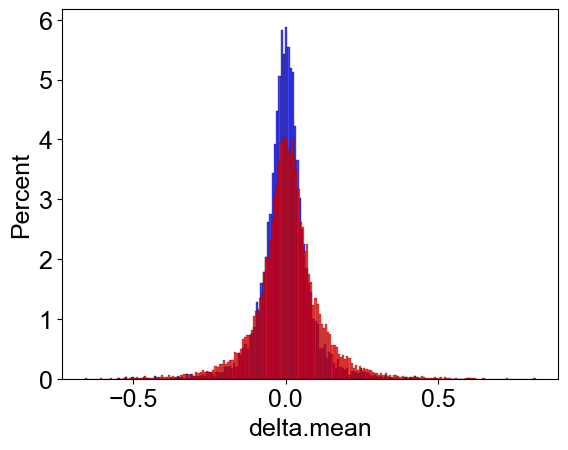

In [18]:
x="delta.mean"

sns.histplot(x=x, data=mpra_noccre, label='nooverlap', color="blue", stat="percent")
sns.histplot(x=x, data=mpra_ccre, label='overlap', color="red", stat="percent")

print(stats.mannwhitneyu(mpra_noccre[x],mpra_ccre[x]))

mpra_noccre[x].describe(),mpra_ccre[x].describe()

In [43]:
mpra_ccre.groupby([ "label", "cl.origin"#"cCRE",
                  ])[x].describe()

count      mean       std       min  \
label                cl.origin                                          
Differential_ATAC    bj           958.0  0.002627  0.102220 -0.522046   
                     hepg2       3402.0  0.006173  0.109292 -0.660015   
                     hob         3945.0  0.014969  0.115479 -0.526812   
                     k562        1623.0  0.005216  0.106841 -0.484169   
Differential_H3K27ac bj          1516.0  0.003946  0.117400 -0.551979   
                     hepg2        246.0 -0.005877  0.104045 -0.464418   
                     hob        10629.0  0.004499  0.104493 -0.604310   
                     k562         143.0  0.000979  0.119213 -0.397417   
Non-differential     bj            34.0  0.031113  0.043095 -0.056785   
                     hepg2         28.0 -0.003625  0.116435 -0.231267   
                     hob           20.0  0.022931  0.091396 -0.206221   
                     k562          29.0  0.018153  0.096441 -0.256693   
Shuffle              bj             9.0 -0.009540  0.106963 -0.142963   
                     hepg2         13.0  0.014340  0.108235 -0.153220   
                     hob           69.0 -0.017029  0.089217 -0.217508   
                     k562           6.0 -0.011303  0.081042 -0.125404   

                                     25%       50%       75%       max  
label                cl.origin                                          
Differential_ATAC    bj        -0.044282  0.007930  0.053483  0.478421  
                     hepg2     -0.048320  0.008380  0.066482  0.522803  
                     hob       -0.043226  0.014631  0.071573  0.620776  
                     k562      -0.050583  0.002978  0.062118  0.646944  
Differential_H3K27ac bj        -0.043630  0.002336  0.053521  0.819849  
                     hepg2     -0.043121  0.002611  0.041404  0.536633  
                     hob       -0.041196  0.002154  0.047390  0.613226  
                     k562      -0.063355 -0.003454  0.052679  0.325302  
Non-differential     bj         0.005438  0.037244  0.062160  0.105206  
                     hepg2     -0.079765 -0.000844  0.074183  0.210128  
                     hob       -0.015441  0.022678  0.084636  0.196061  
                     k562      -0.011975  0.008563  0.079885  0.163680  
Shuffle              bj        -0.088916 -0.012800  0.084616  0.129537  
                     hepg2     -0.016092  0.011715  0.056701  0.276001  
                     hob       -0.071189 -0.027167  0.024197  0.262850  
                     k562      -0.046556 -0.025329  0.041185  0.098518

In [44]:
mpra_noccre.groupby([ "label", "cl.origin"#"cCRE",
                  ])[x].describe()

count      mean       std       min  \
label                cl.origin                                         
Differential_ATAC    bj          151.0 -0.001936  0.088157 -0.463340   
                     hepg2      1267.0  0.005372  0.110719 -0.551274   
                     hob         419.0  0.008276  0.093265 -0.504952   
                     k562        626.0  0.000466  0.098724 -0.455791   
Differential_H3K27ac bj          231.0 -0.006985  0.079207 -0.308313   
                     hepg2       100.0  0.004583  0.078537 -0.171830   
                     hob        4381.0 -0.004757  0.063363 -0.451173   
                     k562         39.0  0.000309  0.129902 -0.354863   
Non-differential     bj            2.0  0.013058  0.002701  0.011149   
                     hepg2         3.0  0.043644  0.044530 -0.001804   
                     hob          14.0  0.001513  0.086407 -0.188578   
                     k562          5.0  0.062154  0.049058  0.006864   
Shuffle              bj            2.0 -0.059630  0.087410 -0.121438   
                     hepg2         9.0 -0.020002  0.031106 -0.091628   
                     hob          22.0  0.003758  0.081182 -0.118922   
                     k562          3.0 -0.000477  0.020612 -0.022183   

                                     25%       50%       75%       max  
label                cl.origin                                          
Differential_ATAC    bj        -0.039126  0.009468  0.049098  0.190051  
                     hepg2     -0.047808  0.008608  0.057684  0.440495  
                     hob       -0.029776  0.003754  0.052113  0.389417  
                     k562      -0.048301 -0.003038  0.046677  0.426191  
Differential_H3K27ac bj        -0.045292 -0.007577  0.035396  0.329890  
                     hepg2     -0.039991  0.002901  0.040042  0.248829  
                     hob       -0.035375 -0.003735  0.027117  0.606148  
                     k562      -0.069514  0.001595  0.037306  0.423544  
Non-differential     bj         0.012104  0.013058  0.014013  0.014968  
                     hepg2      0.021868  0.045539  0.066368  0.087196  
                     hob       -0.028105  0.008394  0.027918  0.215105  
                     k562       0.024609  0.057251  0.097619  0.124430  
Shuffle              bj        -0.090534 -0.059630 -0.028725  0.002179  
                     hepg2     -0.030069 -0.015882 -0.007267  0.013238  
                     hob       -0.026685  0.003545  0.013136  0.292206  
                     k562      -0.010132  0.001919  0.010376  0.018832

MannwhitneyuResult(statistic=91954218.0, pvalue=1.8235465467786024e-21)


(count    7461.000000
 mean        0.014613
 std         0.503987
 min        -2.794969
 25%        -0.159657
 50%         0.197740
 75%         0.341593
 max         3.969121
 Name: l2.ratio.mean.us, dtype: float64,
 count    22968.000000
 mean        -0.038525
 std          0.527562
 min         -2.869390
 25%         -0.313921
 50%          0.137339
 75%          0.324397
 max          4.220316
 Name: l2.ratio.mean.us, dtype: float64)

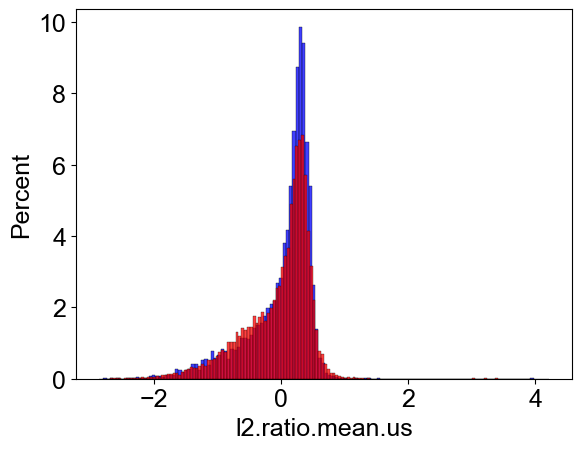

In [21]:
x="l2.ratio.mean.us"

sns.histplot(x=x, data=mpra_noccre, label='nooverlap', color="blue", stat="percent")
sns.histplot(x=x, data=mpra_ccre, label='overlap', color="red", stat="percent")

print(stats.mannwhitneyu(mpra_noccre[x],mpra_ccre[x]))

mpra_noccre[x].describe(),mpra_ccre[x].describe()

In [22]:
mpra_ccre.groupby("cCRE")[x].describe()

,count,mean,std,min,25%,50%,75%,max
cCRE,,,,,,,,
"CTCF-only,CTCF-bound",295.0,-0.155257,0.528361,-2.036856,-0.527619,0.052129,0.253548,0.871896
DNase-H3K4me3,26.0,-0.071899,0.484676,-1.435130,-0.161750,0.038984,0.240695,0.496050
"DNase-H3K4me3,CTCF-bound",101.0,-0.185916,0.601717,-1.764182,-0.625866,0.077586,0.252657,0.661535
PLS,191.0,-0.052900,0.524541,-1.855476,-0.345189,0.081392,0.311218,1.472094
"PLS,CTCF-bound",1400.0,-0.174972,0.591517,-2.769835,-0.570706,-0.028770,0.288819,1.125255
dELS,8808.0,0.015842,0.507260,-2.613910,-0.199090,0.186923,0.345521,3.369019
"dELS,CTCF-bound",7801.0,-0.025226,0.516789,-2.869390,-0.291281,0.145992,0.325181,4.220316
pELS,1081.0,-0.062701,0.524570,-2.616200,-0.316507,0.117848,0.311067,1.062930
"pELS,CTCF-bound",3265.0,-0.134240,0.550591,-2.668918,-0.471760,0.022678,0.272967,2.701148


In [23]:
mpra_noccre.groupby("cCRE")[x].describe()

,count,mean,std,min,25%,50%,75%,max
cCRE,,,,,,,,
.,7461.0,0.014613,0.503987,-2.794969,-0.159657,0.19774,0.341593,3.969121


MannwhitneyuResult(statistic=93215303.0, pvalue=3.04151308635628e-30)


(count    7461.000000
 mean        0.015791
 std         0.487478
 min        -2.666908
 25%        -0.147816
 50%         0.190264
 75%         0.331330
 max         3.690633
 Name: l2.ratio.mean.ctrl, dtype: float64,
 count    22968.000000
 mean        -0.045069
 std          0.510067
 min         -2.858338
 25%         -0.307942
 50%          0.119500
 75%          0.308446
 max          3.942584
 Name: l2.ratio.mean.ctrl, dtype: float64)

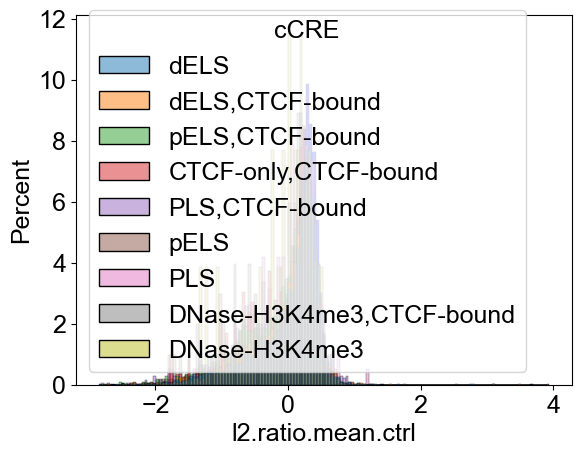

In [15]:
x="l2.ratio.mean.ctrl"

sns.histplot(x=x, data=mpra_noccre, label='nooverlap', color="blue", stat="percent", )
sns.histplot(x=x, data=mpra_ccre, label='overlap', color="red", stat="percent", hue="cCRE", common_norm=False)

print(stats.mannwhitneyu(mpra_noccre[x],mpra_ccre[x]))

mpra_noccre[x].describe(),mpra_ccre[x].describe()

In [29]:
mpra_ccre.groupby([ "label",#"cCRE",
                  ])[x].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Differential_ATAC,9928.0,-0.022943,0.508356,-2.769835,-0.281078,0.131254,0.326291,1.790821
Differential_H3K27ac,12534.0,-0.048666,0.541440,-2.869390,-0.342513,0.144860,0.324504,4.220316
NegCtl_Vikram_MPRA,27.0,0.153641,0.259195,-0.599616,-0.004037,0.170387,0.329060,0.568656
Non-differential,111.0,-0.001524,0.509976,-2.021094,-0.198230,0.174686,0.358238,0.531271
PosCtk_Vikram_MPRA,23.0,0.499061,0.943586,-0.775481,0.092998,0.420171,0.633323,3.022651
PosCtl_bj_luciferase,17.0,-0.048785,0.377362,-1.107464,-0.105884,0.102441,0.235848,0.331765
Promoter_DEG,231.0,-0.149567,0.504779,-2.003304,-0.481577,-0.022723,0.260572,0.713750
Shuffle,97.0,-0.280078,0.477026,-1.605871,-0.628509,-0.160884,0.094606,0.502646


In [27]:
mpra_noccre.groupby(["cCRE", "label"])[x].describe()

count      mean       std       min       25%  \
cCRE label                                                                  
.    Differential_ATAC     2463.0 -0.022371  0.500158 -2.563432 -0.227064   
     Differential_H3K27ac  4751.0  0.029714  0.501383 -2.794969 -0.133246   
     NegCtl_Vikram_MPRA      69.0  0.014982  0.458740 -1.782177 -0.042210   
     Non-differential        24.0  0.242996  0.291620 -0.529081  0.138148   
     PosCtk_Vikram_MPRA      51.0  0.270256  0.829722 -2.577294 -0.108834   
     PosCtl_bj_luciferase     6.0  0.394160  0.105281  0.253770  0.325025   
     Promoter_DEG            60.0  0.029439  0.510468 -1.371106 -0.058391   
     Shuffle                 37.0 -0.049339  0.491848 -1.415744 -0.057493   

                                50%       75%       max  
cCRE label                                               
.    Differential_ATAC     0.148825  0.311686  0.967460  
     Differential_H3K27ac  0.219509  0.353131  1.178686  
     NegCtl_Vikram_MPRA    0.188675  0.304457  0.459143  
     Non-differential      0.284005  0.452326  0.707330  
     PosCtk_Vikram_MPRA    0.225798  0.588020  3.969121  
     PosCtl_bj_luciferase  0.399225  0.460252  0.531857  
     Promoter_DEG          0.248017  0.324154  0.669279  
     Shuffle               0.091460  0.291731  0.531617